# 대중교통 통계자료 (승하차 승객수 분석)

자료이용

- 티머니 카드&페이 -> 이용안내 -> 대중교통 통계자료
- https://pay.tmoney.co.kr/index.dev

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [2]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_3996\2863771375.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
df = pd.read_csv("data/2022_01 교통카드 통계자료.csv", encoding='cp949')

In [4]:
df.head()

,사용월,호선명,역ID,지하철역,승차승객수,하차승객수,작업일시
0,2022-01,1호선,1,서울역,"1,085,116","1,045,157",2022-02-03 08:49:58
1,2022-01,1호선,10,동묘앞,"242,998","251,102",2022-02-03 08:49:58
2,2022-01,1호선,2,시청,"505,634","505,751",2022-02-03 08:49:58
3,2022-01,1호선,3,종각,"828,219","793,362",2022-02-03 08:49:58
4,2022-01,1호선,4,종로3가,"650,549","596,054",2022-02-03 08:49:58


In [5]:
# 필요한 데이터만 뽑기
columns = ['호선명', '지하철역', '승차승객수', '하차승객수']
df_transit = df[columns].copy()

In [6]:
df_transit.head()

,호선명,지하철역,승차승객수,하차승객수
0,1호선,서울역,"1,085,116","1,045,157"
1,1호선,동묘앞,"242,998","251,102"
2,1호선,시청,"505,634","505,751"
3,1호선,종각,"828,219","793,362"
4,1호선,종로3가,"650,549","596,054"


In [7]:
df_transit.tail()

,호선명,지하철역,승차승객수,하차승객수
605,우이신설선,북한산보국문,"155,081","147,294"
606,우이신설선,정릉,"118,944","108,183"
607,우이신설선,성신여대입구(돈암),"88,081","97,012"
608,우이신설선,보문,"39,276","38,693"
609,우이신설선,신설동,"53,794","51,850"


In [8]:
df_transit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     610 non-null    object
 1   지하철역    610 non-null    object
 2   승차승객수   610 non-null    object
 3   하차승객수   610 non-null    object
dtypes: object(4)
memory usage: 19.2+ KB


In [9]:
df_transit = df_transit.astype({'승차승객수' : 'str'})
df_transit = df_transit.astype({'하차승객수' : 'str'})

df_transit['승차승객수'] = df_transit['승차승객수'].str.replace(',', '') # 공백 없애기
df_transit['하차승객수'] = df_transit['하차승객수'].str.replace(',', '') # 공백 없애기

In [10]:
# 계산을 위해서 int로 변환
df_transit = df_transit.astype({'승차승객수' : 'int'})
df_transit = df_transit.astype({'하차승객수' : 'int'})

In [11]:
df_transit.isnull().sum()

호선명      0
지하철역     0
승차승객수    0
하차승객수    0
dtype: int64

In [12]:
df_transit['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '9호선2~3단계', '우이신설선'],
      dtype=object)

In [13]:
df_transit.head()

,호선명,지하철역,승차승객수,하차승객수
0,1호선,서울역,1085116,1045157
1,1호선,동묘앞,242998,251102
2,1호선,시청,505634,505751
3,1호선,종각,828219,793362
4,1호선,종로3가,650549,596054


In [14]:
df_transit['승차승객수'].sort_values(ascending = False)

31     2200763
25     1846733
39     1645306
48     1557231
41     1458026
        ...   
475          5
519          3
331          3
332          1
330          1
Name: 승차승객수, Length: 610, dtype: int32

In [15]:
# 승차승객수로 정렬하기
df_ascending = df_transit.sort_values(by=['승차승객수'], ascending=[False])
df_ascending_2 = df_transit.sort_values(by=['하차승객수'], ascending=[False])

In [16]:
df_ascending_head = df_ascending.head(10)
df_ascending_2_head = df_ascending_2.head(10)

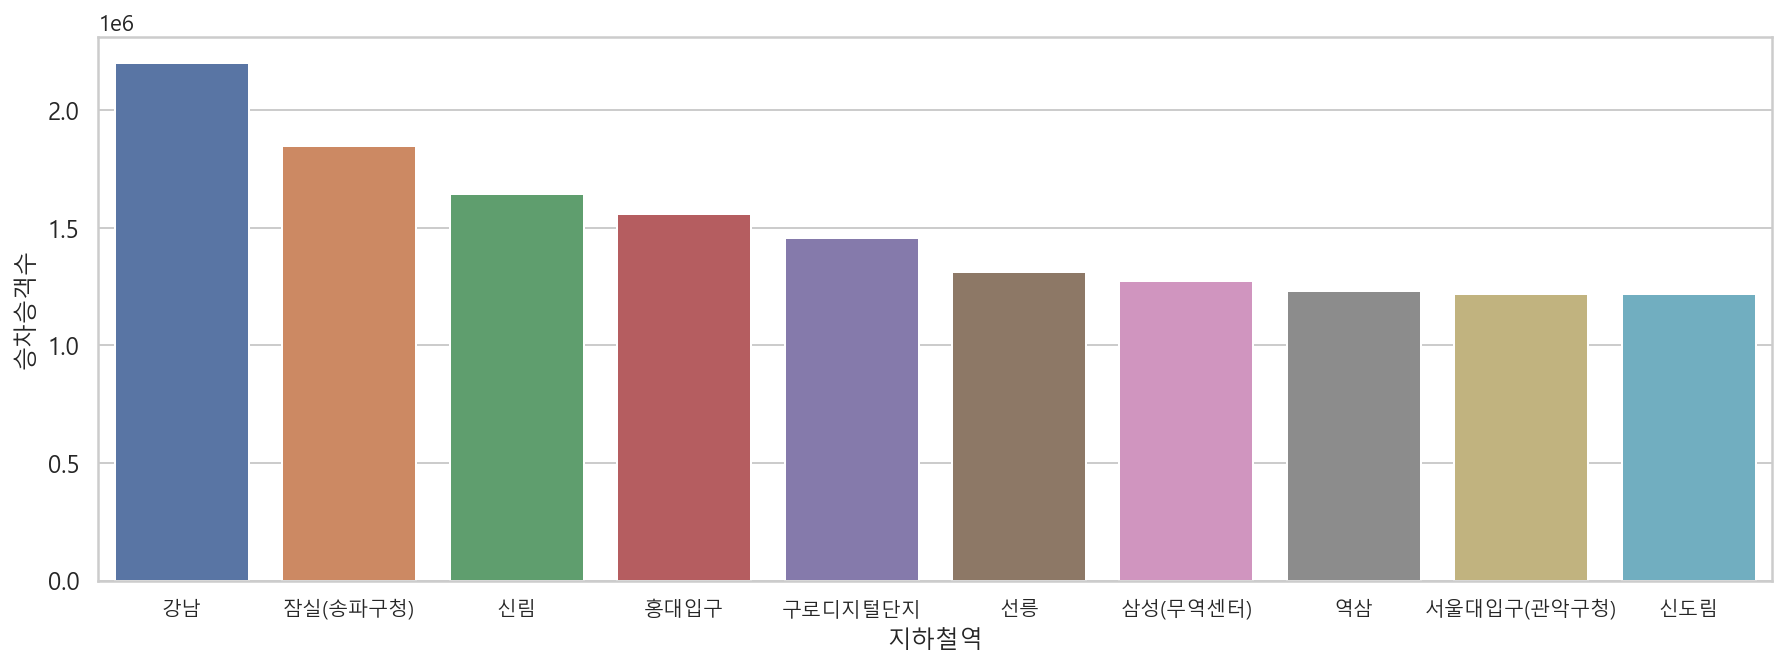

In [17]:
plt.figure(figsize=(15,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
# plt.title("수학 점수 분포", fontsize = 20)
sns.barplot(data = df_ascending_head, x="지하철역", y="승차승객수")
plt.show()

# 승차승객수는 강남 -> 잠실 -> 신림 -> 홍대입구 -> 구로디지털단지 -> 선릉 -> 삼성 -> 역삼 -> 서울대입구 -> 신도림 

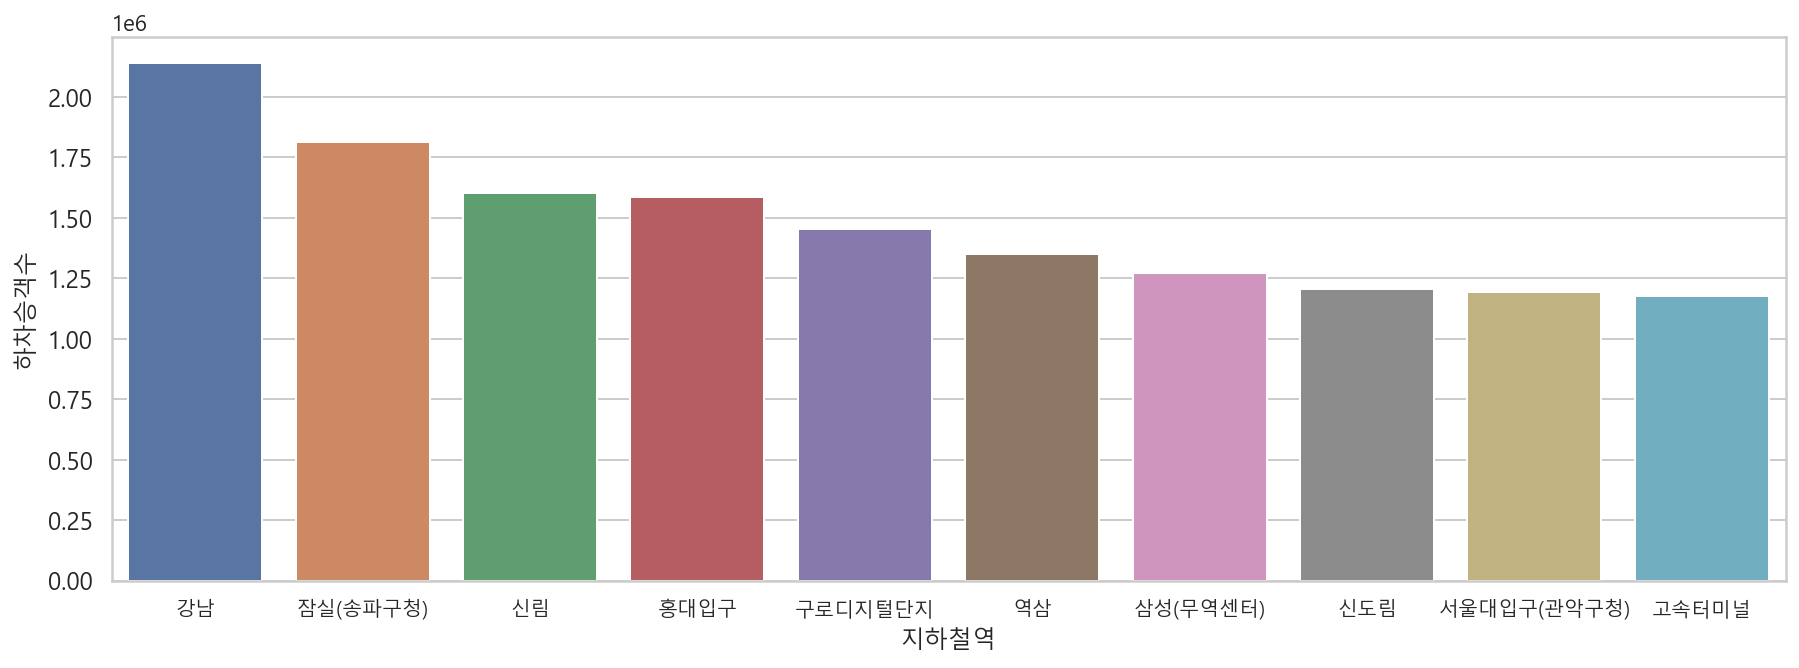

In [18]:
plt.figure(figsize=(15,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
sns.barplot(data = df_ascending_2_head, x="지하철역", y="하차승객수")
plt.show()

# 하차승객수는 강남 -> 잠실 -> 신림 -> 홍대입구 -> 구로디지털단지 -> 역삼 -> 삼성 -> 신도림 -> 서울대입구 -> 고속터미널 

### 정리

- 승하차의 승객수가 가장 많은 top5 지하철역은 강남, 잠실, 신림, 홍대입구, 구로디지털단지 이다.